In [1]:
import numpy
import sympy
from sympy.utilities.lambdify import lambdify
import matplotlib
from matplotlib import pyplot
%matplotlib inline

from sympy import init_printing
init_printing(use_latex = True)

x, nu, t = sympy.symbols('x nu t')

phi = sympy.exp((-(x - 4 * t) ** 2) / (4 * nu * (t + 1))) + sympy.exp(-(x - 4 * t - 2 * sympy.pi) ** 2 / (4 * nu * (t + 1)))
phi

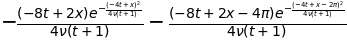

In [2]:
phi_prime = phi.diff(x)
phi_prime

In [3]:
u = -2 * nu * (phi_prime / phi) + 4

u_func = lambdify((t, x, nu), u)

In [4]:
# declare steps and so on
nx = 101
dx = 2 * numpy.pi / (nx - 1)

nt = 100
nu = 0.07
dt = dx * nu

x = numpy.linspace(0, 2 * numpy.pi, nx)
un = numpy.empty(nx)
t = 0

u = numpy.asarray([u_func(t, x0, nu) for x0 in x])

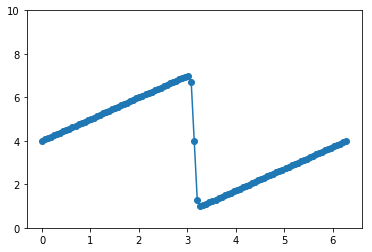

In [5]:
pyplot.plot(x, u, marker = 'o', lw = 1.5)
pyplot.ylim([0, 10]);

In [6]:
for n in range(nt):
    un = u.copy()
    
    for i in range(1, nx - 1):
        u[i] = un[i] - un[i]  * dt / dx * (un[i] - un[i - 1]) + nu * dt / dx ** 2 * (un[i + 1] - 2 * un[i] + un[i - 1])
    
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx ** 2 * (un[1] - 2 * un[0] + un[-2])
    
    u[-1] = u[0]
    
u_analytical = numpy.asarray([u_func(nt * dt, x1, nu) for x1 in x])

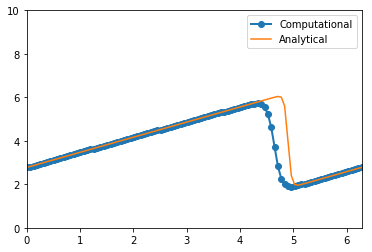

In [7]:
pyplot.plot(x, u, marker = 'o', lw = 2, label = 'Computational')
pyplot.plot(x, u_analytical, label = 'Analytical')
pyplot.xlim([0, 2 * numpy.pi])
pyplot.ylim([0, 10])
pyplot.legend();